# 1D inversion of magnetotelluric data
## Example 1: inversion of synthetic MT data

## 0. Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cofi
from espresso import Magnetotelluric1D

### Create synthetic data given a simple 3 layers Earth model

In [2]:
mt = Magnetotelluric1D(example_number=1)

#### 0.1. Define a synthetic resistivity model and plot it

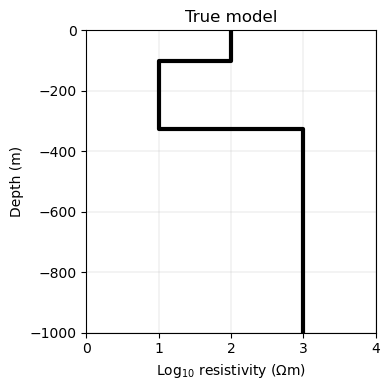

In [3]:
fig = mt.plot_model(mt.good_model, title='True model')

#### 0.2. Load and plot responses of this model (plus added noise)

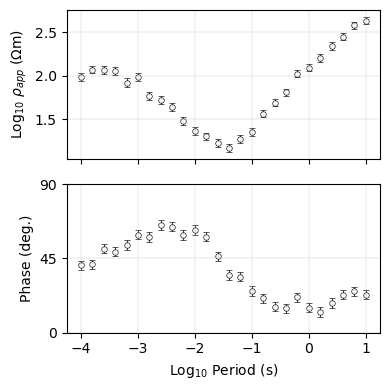

In [4]:
fig = mt.plot_data(mt.data, Cm = mt.covariance_matrix)


## 1. Define the problem

In [5]:
# define CoFI BaseProblem
mt_problem = cofi.BaseProblem()
mt_problem.set_initial_model(mt.starting_model)

In [6]:
# add regularization: smoothing
smoothing_factor = 50
reg_smoothing = smoothing_factor * cofi.utils.QuadraticReg("smoothing", (mt.model_size,))
reg = reg_smoothing

In [7]:
def objective_func(model, reg):
    dpred = mt.forward(model)
    data_misfit = mt.misfit(mt.data,dpred,mt.inverse_covariance_matrix)
    model_reg = reg(model)
    return  data_misfit + model_reg

In [8]:
mt_problem.set_objective(objective_func, args=[reg])

In [9]:
#mt_problem.summary()

## 2. Define the inversion options

In [10]:
#mt_problem.suggest_tools();

In [11]:
my_options = cofi.InversionOptions()
my_options.set_tool("scipy.optimize.minimize")
my_options.set_params(method="L-BFGS-B",options={'ftol':1e-3,'maxiter': 100})

## 3. Start an inversion

In [12]:
print("Running inversion...")
inv = cofi.Inversion(mt_problem, my_options)
inv_result = inv.run()
print("   done!")

Running inversion...
   done!


In [13]:
inv_result.summary()

Summary for inversion result
SUCCESS
----------------------------
fun: 42.42880460311559
jac: [ 2.26459919e-01  3.04787379e+00 -2.77086942e+00  1.20617828e+00
  7.87994030e-01 -1.22297906e+00 -1.54698442e+00  5.70761220e-01
 -1.81808845e+00 -2.07501075e+00 -1.80111216e+00 -4.63189383e+00
 -4.42713526e+00 -3.03423276e+00 -3.19594166e+00 -2.63277686e+00
  2.68082802e-01 -4.74940978e-01 -5.08875789e-01 -5.48418203e-02
 -9.56063678e-01 -1.23566367e+00 -4.63622032e-01 -6.04813980e-03
 -7.07910890e-01 -2.07826717e+00 -1.77273379e+00  3.54603460e-02
  6.07923315e-01 -4.94987521e-01 -1.00214593e+00 -1.54720682e-01
  1.90233608e-02 -1.10814754e+00 -7.32556065e-01  1.50095759e+00
  1.62056467e+00 -4.65850295e-01 -1.43172586e+00 -6.01528431e-01
  5.64170936e-04 -7.23367326e-01  8.81740908e-02  2.17579058e+00
 -3.55588983e-01 -4.70670616e-01  1.32654990e+00 -3.08625376e+00
  1.65895032e+00 -5.09590595e-01]
nfev: 2091
njev: 41
nit: 35
status: 0
message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSM

## 4. Plotting results

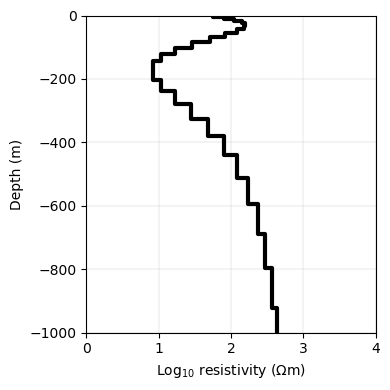

In [14]:
fig = mt.plot_model(inv_result.model);            # inverted model

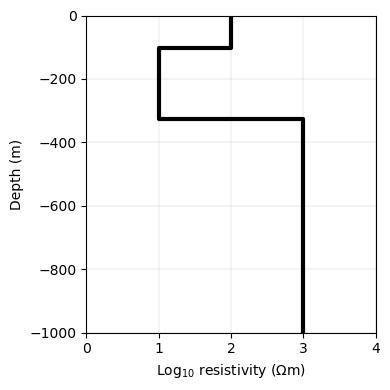

In [15]:
fig = mt.plot_model(mt.good_model);       # true model

nRMSE = 0.864


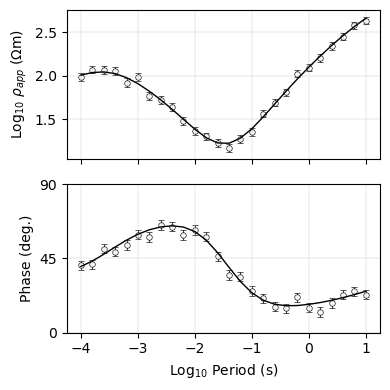

In [16]:
fig = mt.plot_data(mt.data, mt.forward(inv_result.model), Cm = mt.covariance_matrix)
nRMSE = np.sqrt(mt.misfit(mt.data, mt.forward(inv_result.model), Cm_inv = mt.inverse_covariance_matrix)/mt.data_size)
print('nRMSE = %.3f'%nRMSE)